# Transformada de Fourier

Este código hace la transformada discreta de Fourier (DFT) $\hat{f}$ de una función $f$ conocida en un número $N$ de puntos, de acuerdo con la fórmula:

$$
\hat{f}_m = \sum_{n = 0}^{N - 1} c_ne^{2\pi i\frac{nm}{N}}
$$

Los coeficientes se calculan con:

$$
c_n = \frac{1}{N} \sum_{k = 0}^{N - 1} f_ke^{-2\pi i\frac{nk}{N}}
$$

donde $f_k = f(x_0 + k\frac{L}{N})$, con $x_0$ el primer punto en que se conoce $f$ y $L$ la longitud del intervalo en que se conocen los puntos de $f$.

In [1]:
import numpy as np
from cmath import exp
from math import pi
import matplotlib.pyplot as plt

In [2]:
a = complex(2, 3)
b = 2 + 3j

print(type(a), type(b))

<class 'complex'> <class 'complex'>


In [3]:
# Esta función calcula el n-ésimo coeficiente de la transformada
def coeficiente_de_fourier(f, delta, N, n):
    suma_k = 0.0
    for k in range(N):
        suma_k += f[k] * exp(-2.0 * pi * n * k / N)
    return suma_k / N

In [7]:
# Esta función calcula un punto de la transformada de Fourier
# de una función discretizada
def transformada_de_fourier(funcion, delta, m): # delta es la distancia entre los puntos de f conocidos
    N = len(funcion)
    f_hat_m = 0.0
    for n in range(N):
        f_hat_m += coeficiente_de_fourier(funcion, delta, N, n) * exp(2.0 * pi * n * m / N)
    return f_hat_m

#### Ejemplo

In [10]:
N = 100
# Pongamos que la función se conoce en el intervalo [a, b]
a = 0.0
b = 1.0
delta = abs(b - a) / N

x = np.linspace(a, b, N)
funcion_prueba = np.sin(x)
f_hat = []

for i in range(N):
    f_hat.append(transformada_de_fourier(funcion_prueba, delta, i))

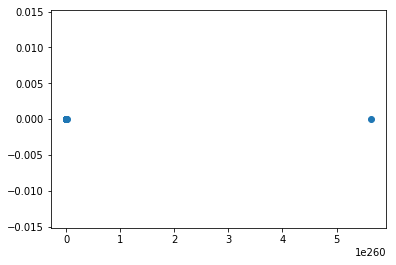

In [11]:
X = [x.real for x in f_hat]
Y = [x.imag for x in f_hat]

plt.scatter(X, Y)